<a href="https://colab.research.google.com/github/Tarunrathi22/Tarun/blob/main/image_recognitiontarun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE PROCESSING LIBRARY

Now we will study about image processing libraries.
libraries which is used to perform
operations on image like resize, adding text, change pixel colour values, read image, draw image and many more operations.
<br>
<br>
we will go through the **OPEN CV** library of python.
OpenCV is one of the most popular computer vision libraries. If you want to start your journey in the field of computer vision, then a thorough understanding of the concepts of OpenCV is of paramount importance.

In this article, to understand the basic functionalities of Python OpenCV module, we will cover the most basic and important concepts of OpenCV intuitively:

1. Reading an image
2. Extracting the RGB values of a pixel
3. Extracting the Region of Interest (ROI)
4. Resizing the Image
5. Rotating the Image
6. Drawing a Rectangle
7. Displaying text

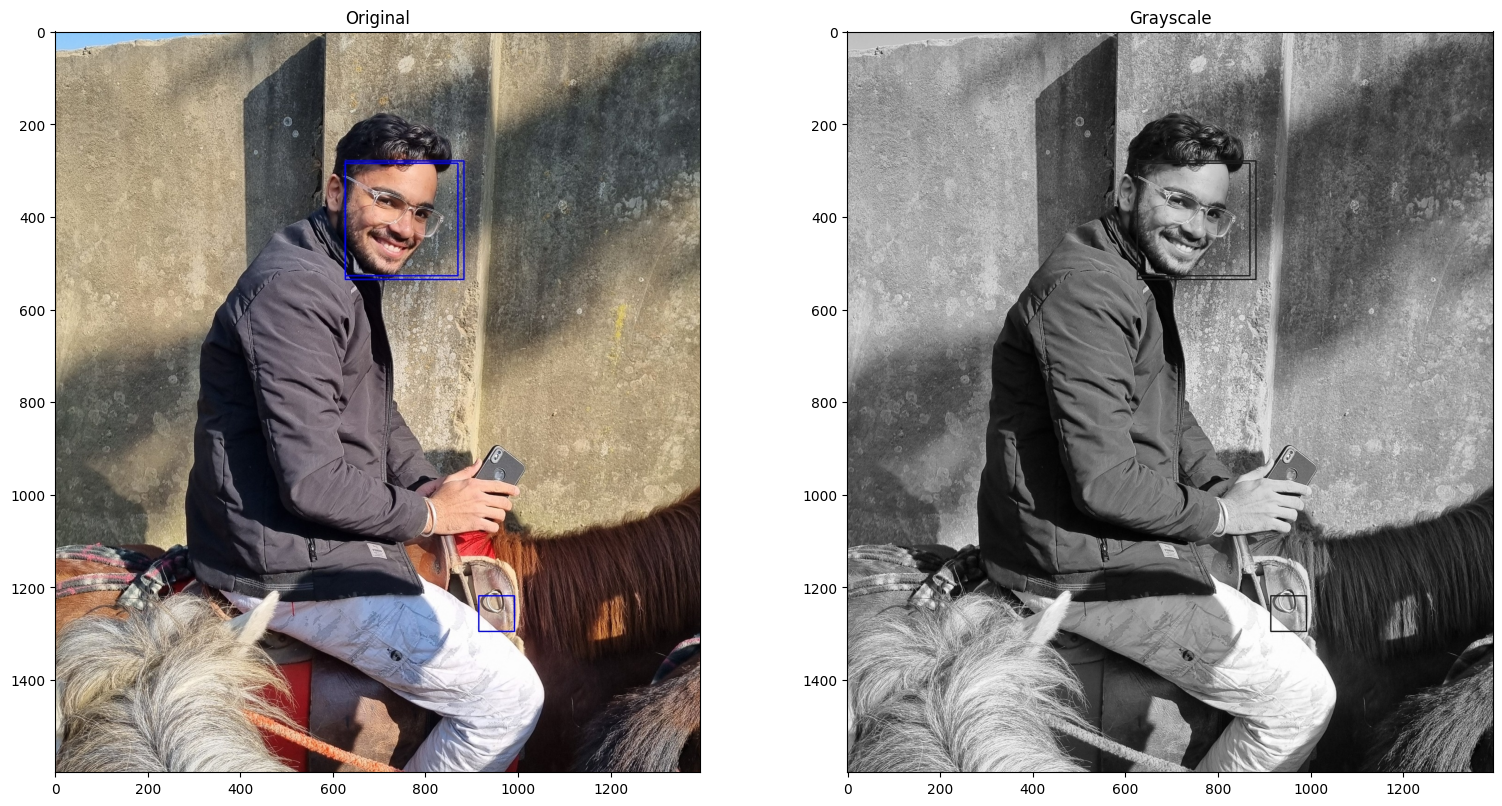

In [28]:
# Gray-scaling


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread("/content/goku.jpg")
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()



A colored image consists of 3 color channels where a gray image only consists of 1 Color channel which carries intensity information for each pixel showing the image as black-and-white.

The following code separates each color channel:

In [29]:
b, g, r = cv.split(img)

# fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(r, cv.COLOR_BGR2RGB))
ax[0].set_title("Red")

ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Green")

# ax[2].imshow(cv.cvtColor(b, cv.COLOR_BGR2RGB))
# ax[2].set_title("Blue")

Text(0.5, 1.0, 'Green')

image translation


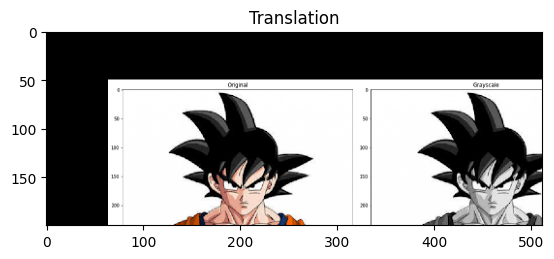

In [ ]:
image = cv.imread("/content/goku.jpg")
h,w= image.shape[:2]
half_height, half_width=h//4,w//8
translation_matrix = np.float32([[1,0,half_width],[0,1,half_height]])
img_translation=cv.warpAffine(image,translation_matrix,(w,h))
plt.imshow(cv.cvtColor(img_translation,cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()

In [ ]:
pip install tensorflow

In [30]:
import cv2
#read image
img= cv2.imread("/content/goku.jpg")
#print its shape
print('image dimensions :',img.shape)


image dimensions : (1600, 1394, 3)


In [31]:
#read image as greyscale
img=cv2.imread("/content/goku.jpg",cv2.IMREAD_GRAYSCALE)
print('image dimension :',img.shape)

image dimension : (1600, 1394)


In [32]:
#read image wth transparency channel
img=cv2.imread("/content/goku.jpg",cv2.IMREAD_UNCHANGED)
print('image dimension :',img.shape)

image dimension : (1600, 1394, 3)


In [48]:

img = cv2.imread("/content/goku.jpg")
#show image
cv2.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindow()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [46]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  47195      0 --:--:-- --:--:-- --:--:-- 47726


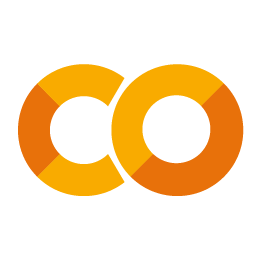

In [45]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

img = cv2.imread("/content/goku.jpg")
#show image
cv2.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindow()

In [41]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  45050      0 --:--:-- --:--:-- --:--:-- 45340


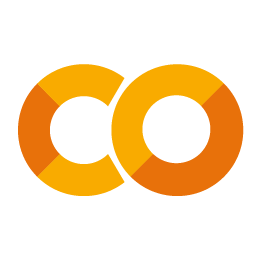

In [42]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#image processing
detect he faces in the image


In [26]:
import cv2
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s-%(levelname)s-%(message)s')

def load_image(image_path):
    try:
        image = cv2.imread(image_path)
        x=cv2.imshow(image_path,image)
        if image is None:
            raise FileNotFoundError(f"No image found at {image_path}")
        logging.info(f"Image loaded from {image_path}")
        return image
    except Exception as e:
        logging.error(f"Error loading image: {e}")
        raise

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    logging.info('Converted image to grayscale')
    return gray_image

def detect_faces(gray_image, classifier_path):
    face_cascade = cv2.CascadeClassifier(classifier_path)
    if face_cascade.empty():
        raise ValueError(f"Failed to load classifier from {classifier_path}")

    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
    logging.info(f"Detected {len(faces)} faces")
    return faces

def draw_faces(image, faces):


    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    logging.info('Drew rectangles around faces')
    return image

def save_image(image, output_path):
    cv2.imwrite(output_path, image)
    logging.info(f'Saved image with faces to {output_path}')

def main(image_path, classifier_path, output_path):
    try:
        image = load_image(image_path)
        gray_image = convert_to_grayscale(image)
        faces = detect_faces(gray_image, classifier_path)
        image_with_faces = draw_faces(image, faces)
        save_image(image_with_faces, output_path)
        logging.info('Face detection completed successfully')
    except Exception as e:
        logging.error(f"An error occurred: {e}")

if __name__ == "_main_":
    image_path = r"/content/tarun (2).jpg"
    classifier_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    output_path = r"/content/goku.jpg"  # Changed to avoid overwriting
    main(image_path, classifier_path, output_path)